In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error,precision_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

In [2]:
data=pd.read_csv('logistic regression dataset-Social_Network')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [4]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

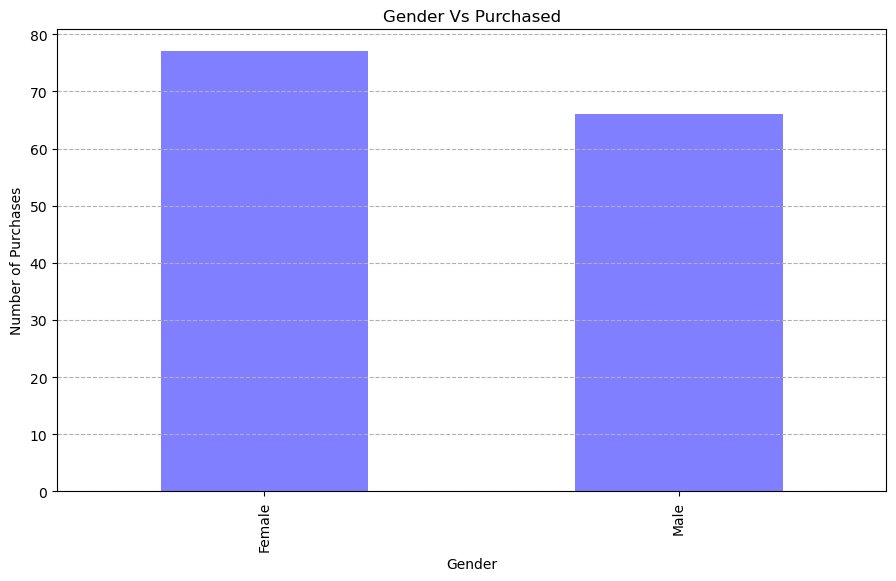

In [5]:
plt.figure(figsize=(10.7, 6))
grouped = data.groupby('Gender')['Purchased'].sum()
grouped.plot(kind='bar', color='blue', alpha=0.5)
plt.title('Gender Vs Purchased')
plt.ylabel('Number of Purchases')
plt.grid(True, linestyle='--', axis='y')
plt.show()

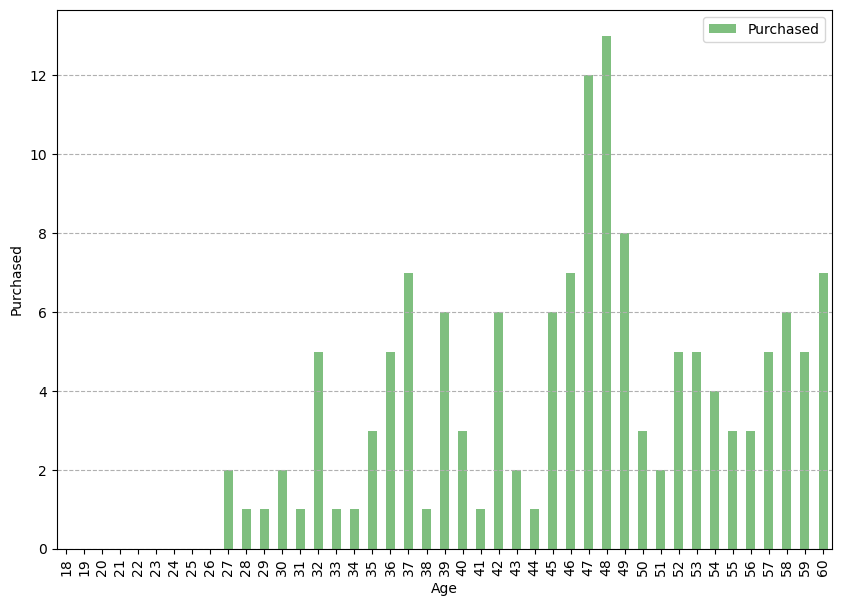

In [6]:
plt.figure(figsize=(10,7))
gruped_1=data.groupby('Age')['Purchased'].sum()
gruped_1.plot(kind='bar',color='green',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.grid(True,axis='y',linestyle='--')
plt.legend()
plt.show()


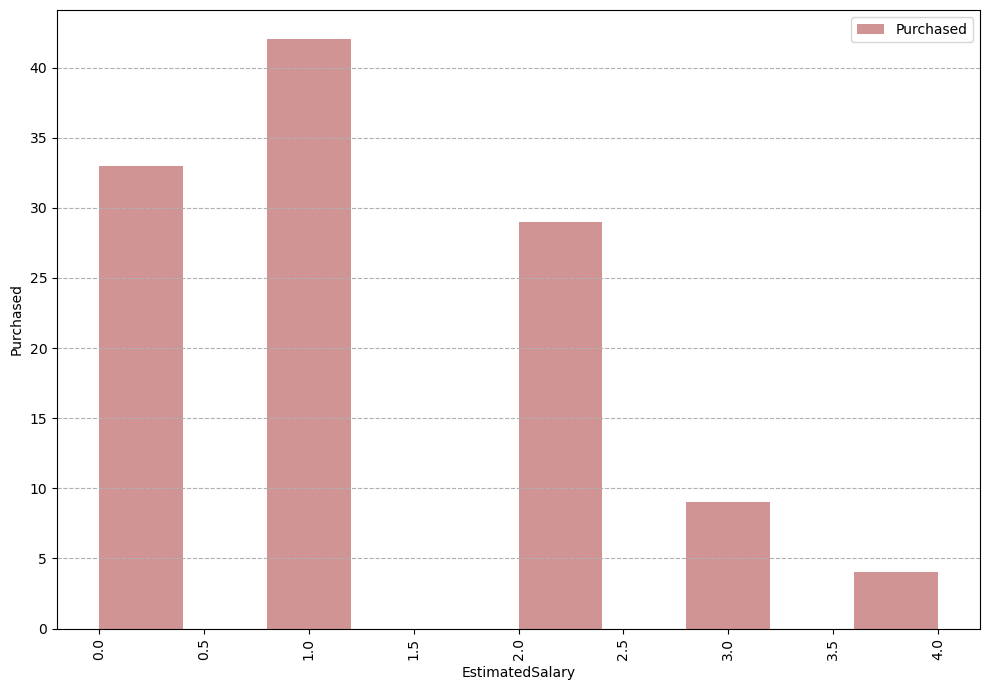

In [7]:
plt.figure(figsize=(10,7))
gruped_2=data.groupby('EstimatedSalary')['Purchased'].sum()
gruped_2.plot(kind='hist',color='brown' ,alpha=0.5)
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(True,linestyle='--',axis='y')
plt.legend()
plt.show()

In [8]:
Oe=OrdinalEncoder()
new_column=Oe.fit_transform(data[['Gender']])
data['Gender']=new_column
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1.0,19,19000,0
1,15810944,1.0,35,20000,0
2,15668575,0.0,26,43000,0
3,15603246,0.0,27,57000,0
4,15804002,1.0,19,76000,0
...,...,...,...,...,...
395,15691863,0.0,46,41000,1
396,15706071,1.0,51,23000,1
397,15654296,0.0,50,20000,1
398,15755018,1.0,36,33000,0


In [9]:
X=data.drop('Purchased',axis=1)
y=data['Purchased']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
new=data.corr()
new

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.025249,-0.000721,0.071097,0.007120
Gender,-0.025249,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.000721,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,-0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,-0.042469,0.622454,0.362083,1.000000


In [12]:
X_train

,User ID,Gender,Age,EstimatedSalary
3,15603246,0.0,27,57000
18,15704583,1.0,46,28000
202,15735549,0.0,39,134000
250,15810075,0.0,44,39000
274,15692819,0.0,57,26000
...,...,...,...,...
71,15726358,0.0,24,27000
106,15706185,0.0,26,35000
270,15680752,0.0,43,133000
348,15579212,1.0,39,77000


In [30]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

<Axes: >

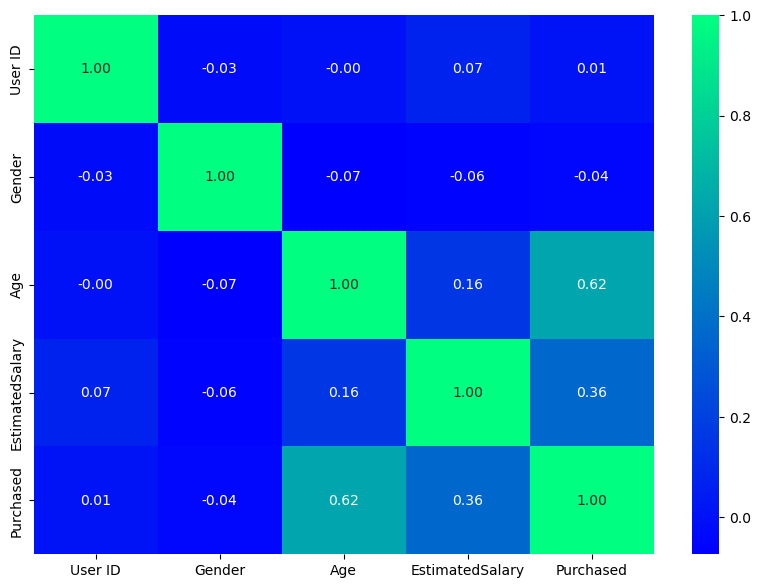

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(new,annot=True,cmap='winter',fmt='.2f')

In [14]:
Log_reg=LogisticRegression()
Log_reg.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_pred=Log_reg.predict(X_test)

In [16]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [22]:
print('classification_report:',classification_report(y_pred,y_test))
print('accuracy_score:',accuracy_score(y_pred,y_test))
print('precision_score:',precision_score(y_pred,y_test))

classification_report:               precision    recall  f1-score   support

           0       0.96      0.88      0.92        57
           1       0.75      0.91      0.82        23

    accuracy                           0.89        80
   macro avg       0.86      0.90      0.87        80
weighted avg       0.90      0.89      0.89        80

accuracy_score: 0.8875
precision_score: 0.75


In [23]:
X.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [27]:
new_data = pd.DataFrame({
    'User ID': [15624510,15810944],
    'Gender': [1.0, 1.0],           # Assuming 0.0 = Female, 1.0 = Male (based on your encoding)
    'Age': [27,46],
    'EstimatedSalary': [57000, 28000]
})

In [28]:
new_data_pred=Log_reg.predict(new_data)

In [29]:
new_data_pred

array([0, 0], dtype=int64)